<center> <h1>Extracting Text from ALTOs</h1> 

<center>In this example, we will use the alto-parser code to read in a specific book's ALTO files and output the text content.<center>

## Importing the ALTO parser

Here, we import the parser code and set the path to the ALTO files. Additionally, an AltoFactory object will help in creating AltoFile instances from the alto xml files.

In [1]:
import utils.altoparser.alto as alto
import os 

data_path= os.path.join(os.getcwd(), "IE14008261")
factory = alto.AltoFactory(data_path)

In [2]:
from os import listdir
xmlfiles = [f for f in listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
xml_files = factory.load_files(xmlfiles)
#xml_files = factory.load_files(['FL14008693.xml'])

## Saving the text content within the ALTO files

In [3]:
with open("data.txt", "w", encoding="utf-8") as text_file:
    for xml_file in xml_files:
        #print('\n\n******Page******: ' + xml_file.layout.pages[0].id + '\n\n')
        for block in xml_file.layout.pages[0].print_space:
            if type(block) == alto.TextBlock:
                for line in block:
                    for line_part in line:
                        if type(line_part) == alto.String:
                            text_file.write(str(line_part.content))
                            text_file.write(" ")
                            #print(line_part.content, end=' ')
                        elif type(line_part) == alto.Sp:
                            text_file.write(" ")
                            #print(' ', end='')
            elif type(block) == alto.ComposedBlock:
                for block in block:
                    if type(block) == alto.TextBlock:
                        for line in block:
                            for line_part in line:
                                if type(line_part) == alto.String:
                                    text_file.write(str(line_part.content))
                                    text_file.write(" ")
                                    #print(line_part.content, end=' ')
                                elif type(line_part) == alto.Sp:
                                    text_file.write(" ")
                                    #print(' ', end='')
                            #print(' ')

## SpaCy for Named Entity Recognition
SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus.

In [4]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

One of the nice things about Spacy is that we only need to apply nlp once, the entire background pipeline will return the objects.



In [5]:
with open('data.txt', 'r', encoding="utf8") as file:
    data = file.read().replace('\n', '')

import re

data = re.sub(' \.\.\. ', ' ',data)
data = re.sub("\s\s+" , " ",data)
data = re.sub('- ','',data)

In [6]:
nlp.max_length = 4000000

In [7]:
from pprint import pprint
doc = nlp(data)
#pprint([(X.text, X.label_) for X in doc.ents])
len(doc.ents)

28571

With nlp applied to the text data, doc.ents represents the named entities recognised in the text.

In [8]:
filt = ["PERSON","GPE","LOC","NORP","ORG","PRODUCT","EVENT","WORK OF ART","LANGUAGE"]
filt1 = ["PERSON", "GPE", "LOC", "NORP"]
items = [x.text for x in doc.ents if x.label_ in filt1]
counts = Counter(items).most_common(55)
counts

[('British', 337),
 ('the United Kingdom', 212),
 ('Victoria', 208),
 ('New South Wales', 191),
 ('A. B.', 164),
 ('England', 128),
 ('C. D.', 128),
 ('Sydney', 125),
 ('Ireland', 122),
 ('Scotland', 90),
 ('Great Britain', 76),
 ('United Kingdom', 66),
 ('VIII', 64),
 ('Gazette', 58),
 ('Majesty', 57),
 ('London', 52),
 ('E. F.', 51),
 ('XIII', 49),
 ('William IV', 44),
 ('William the Fourth', 34),
 ('Queensland', 30),
 ('lien', 28),
 ('XXVII', 27),
 ('XXXIII', 23),
 ('Christian', 23),
 ('Tonnage', 23),
 ('Ilis', 22),
 ('X.', 21),
 ('William', 21),
 ('XXXVII', 21),
 ('Moreton Bay', 19),
 ('Brisbane', 19),
 ('the United Kingdom of Great Britain', 19),
 ('Cumberland', 19),
 ('George the', 18),
 ('Port Jackson', 18),
 ('Queen', 18),
 ('Europe', 17),
 ('George the Fourth', 17),
 ('George IV', 16),
 ('XXXIV', 16),
 ('XXXVIII', 16),
 ('George', 16),
 ('Registrar', 16),
 ('His Majesty', 15),
 ('the Colony of Queensland', 15),
 ('George III', 15),
 ('India', 14),
 ('Port Phillip', 14),
 ('C.D

## Visualising the Data

We can render the recognised entities in the text using displacy. The following is a render of the first 50 'sentences' in the text.

In [12]:
sentences = [x for x in doc.sents]

options = {"ents": ["PERSON","GPE","LOC","NORP","ORG","PRODUCT","EVENT","WORK OF ART","LANGUAGE"]}
options2 = {"ents": ["PERSON","GPE","LOC","NORP"]}

for i in range(len(sentences[:50])):
    displacy.render(nlp(str(sentences[i])), jupyter=True, style='ent', options = options2)

#displacy.render(doc, jupyter=True, style='ent', options = options2)
    
#colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
#options = {"ents": ["ORG"], "colors": colors}
#displacy.serve(doc, style="ent", options=options)

C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\Users\sali\AppData\Local\Continuum\anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


To visualise the contents of the book, we can create word clouds.

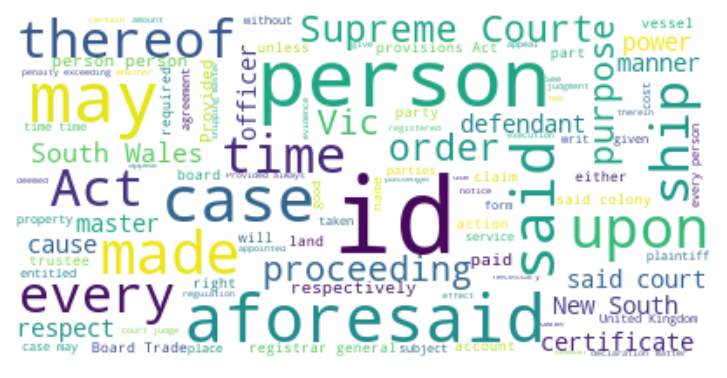

In [21]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150


commons = []
for x in counts:
    commons.extend([x[0]]*x[1]) 
    
text = data

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=60, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

A more insightful word cloud appears when we only consider named entities within the text.

In [17]:
# Create dictionary of frequencies for most common words
freq = {}
for c in counts:
    freq[c[0]] = c[1]

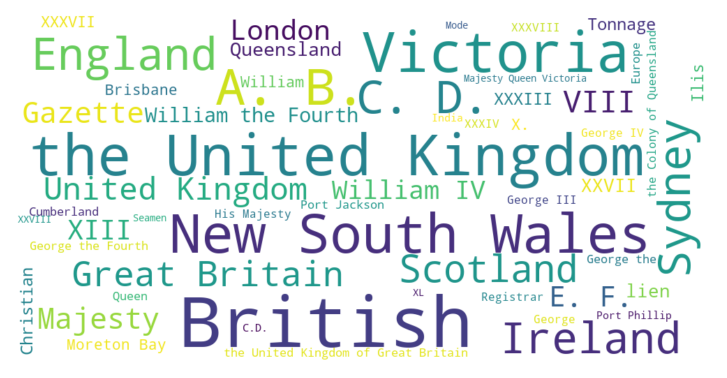

In [23]:
# Create and generate a word cloud image from a dictionary of most common words:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", width = 1000, height = 500).generate_from_frequencies(freq)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Using Voyant Tools for Text Analysis

In our project, we are using a locally deployed Voyant Tools server to produce interactible visualisations on the book's data.

(If using a different Voyant-Tools deployment, just change the url in driver.get(url))

In [47]:
import webbrowser
webbrowser.open('http://inventwithpython.com/')

True

For the following code to run, you need to have the chromedriver in the same directory (https://sites.google.com/a/chromium.org/chromedriver/downloads)

In [56]:
import os
from selenium import webdriver

driver = webdriver.Chrome(os.path.join(os.getcwd(),"chromedriver.exe"))

In chrome, load the webpage for the Voyant Tools server, listening on port 8888

In [77]:
driver.get('http://localhost:8888')

Access the upload button of Voyant Tools and send text data retrieved earlier. The resultant visualisations will be loaded in chrome.

In [78]:
# Select the upload box
upload_box = driver.find_element_by_id("fileuploadfield-1018-button-fileInputEl")

In [79]:
# Complete path of the file
file_location = os.path.join(os.getcwd(),"data.txt")

# Send the file location to the button
upload_box.send_keys(file_location)

This is a sample of what the interactible dashboard looks like in Voyant.

<img src="files/voyant1.png">

Again, for improved insight, it would be a better idea to visualise the named entities recognised by SpaCy.

We will create a separate text file with the named entities, and pass it to Voyant Tools.

In [80]:
items = [x.text for x in doc.ents if x.label_ in filt1]
names = " ".join(items)

# Writing 'names' string into a text file
file1 = open("names.txt","w")
file1.write(names) 
file1.close() 

In [81]:
driver.get('http://localhost:8888')

In [82]:
# Select the upload box
upload_box = driver.find_element_by_id("fileuploadfield-1018-button-fileInputEl")

In [83]:
# Complete path of the file
file_location = os.path.join(os.getcwd(),"names.txt")

# Send the file location to the button
upload_box.send_keys(file_location)

Now, we have a better view of the frequency with which named entities appear in the text.

<img src="files/voyant2.png">